In [17]:
#basic library
import numpy as np
import pandas as pd
import seaborn as sns
import sys

#Customs functions 
package_path = '..'
sys.path.insert(0, package_path)
from functions.descriptive import *

# Introduction
## Data import 

In [2]:
train = pd.read_csv(r'C:\Users\mehdy\Desktop\Work\KAGGLE\Mobile-price-classiffication\data\train.csv')
test =  pd.read_csv(r'C:\Users\mehdy\Desktop\Work\KAGGLE\Mobile-price-classiffication\data\test.csv')
print(' train :', train.shape, ' test : ', test.shape)

 train : (2000, 21)  test :  (1000, 21)


In [9]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [82]:
train.price_range = train.price_range.astype('category')

In [12]:
X = train.drop(columns=['price_range'])
y = train.price_range
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


Here this is about multi_class classification.

In [14]:
y.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [38]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [39]:
col_category = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
X[col_category] = X[col_category].astype('category')

We see that a lot of variables are integer, and some are categorical 

In [43]:
def effectif_int(data):
    df = data.select_dtypes(include = ['int','float'])
    df = df.describe().T
    df.drop(columns='count', inplace=True)
    return df 

def type_of_vars(data):
    typ_var = pd.DataFrame(data.dtypes)
    typ_var.columns = ['Types variables']
    return typ_var

type_of_vars(X)

,Types variables
battery_power,int64
blue,category
clock_speed,float64
dual_sim,category
fc,int64
four_g,category
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


# Descriptive analysis

## Missing values 

On the first pitch we will look at the missing values 

In [50]:
descriptiv_pipe = Descriptive_analysis()
descriptiv_pipe 

descriptiv_pipe.missing_values(X = train)

There is no missing values


## Effectifs

In [51]:
df_eff = effectif_int(X) 
df_eff.columns = ['mean'	,'std'	,'minim'	,'25%',	'50%',	'75%',	'maxi']
df_eff

,mean,std,minim,25%,50%,75%,maxi
battery_power,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


## Histograms 

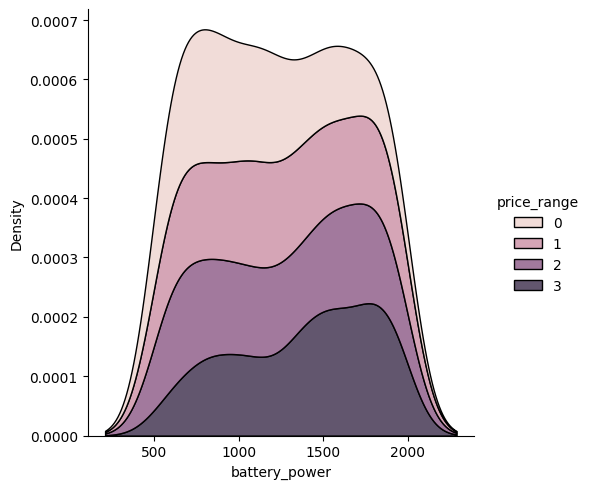

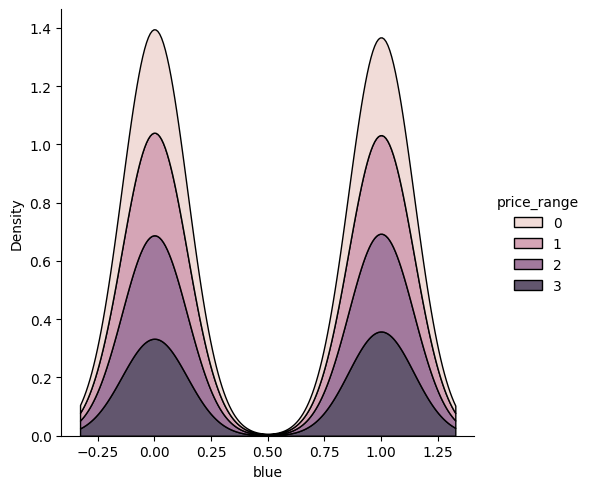

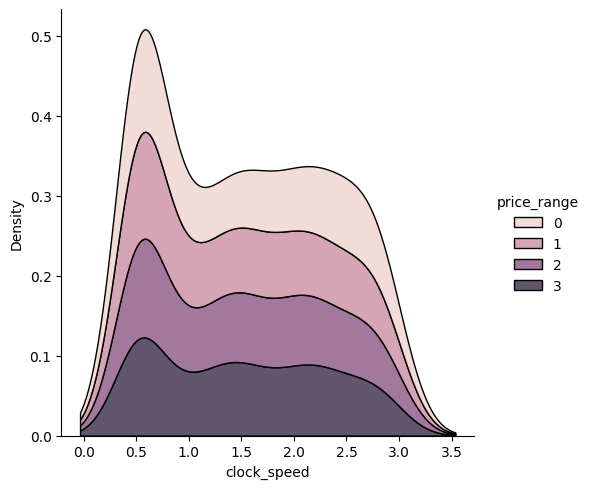

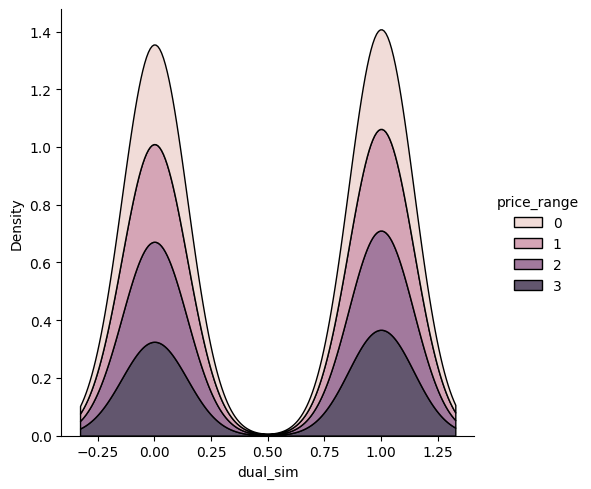

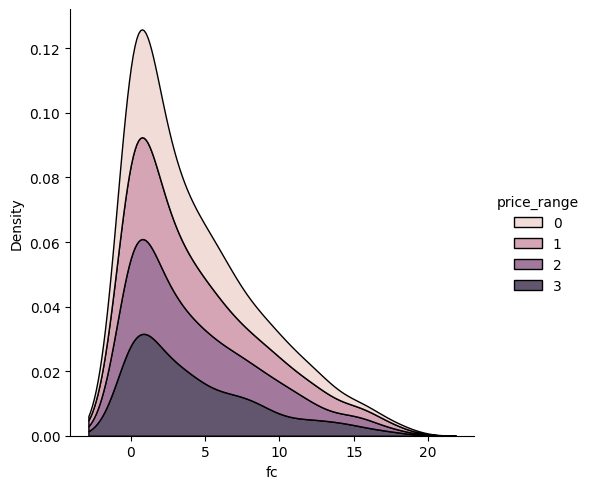

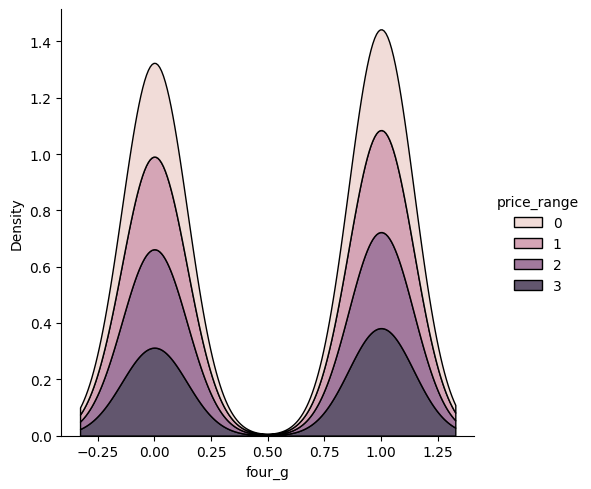

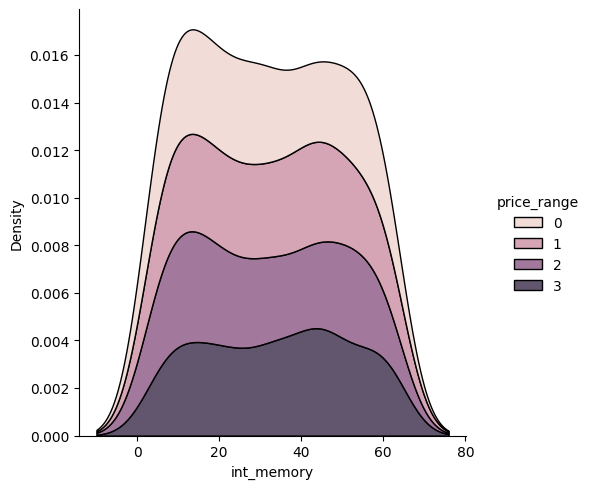

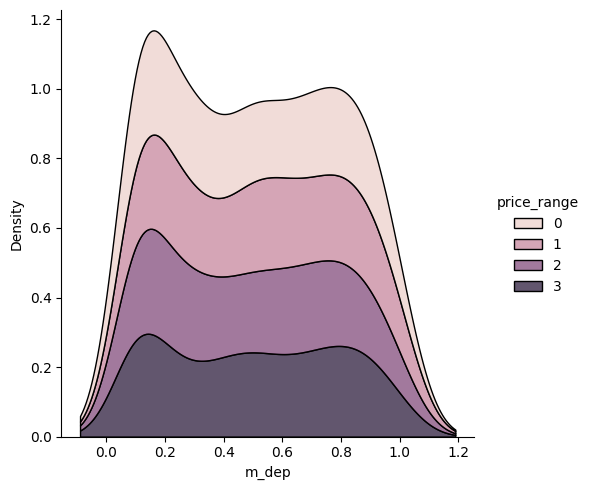

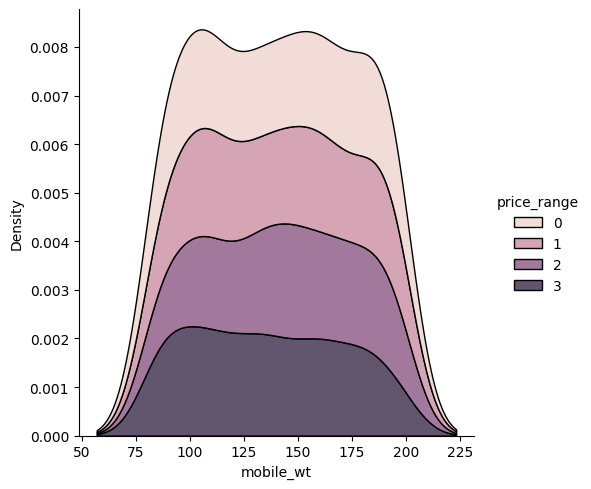

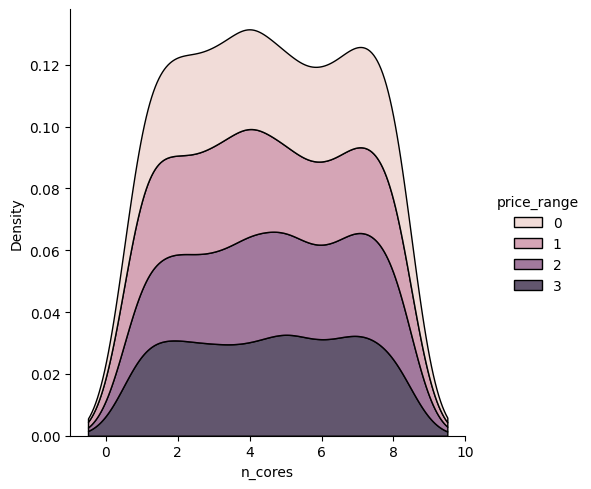

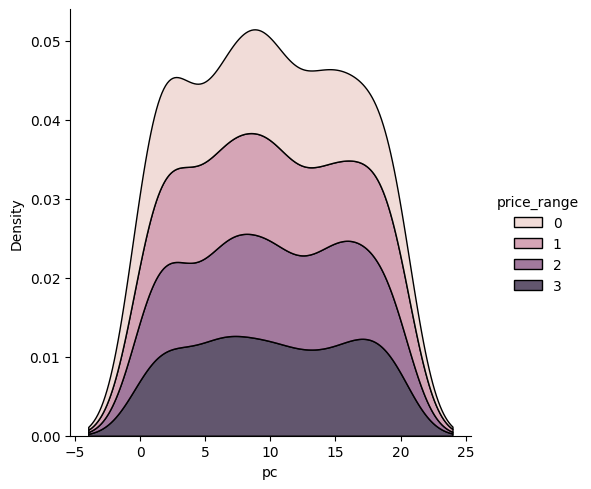

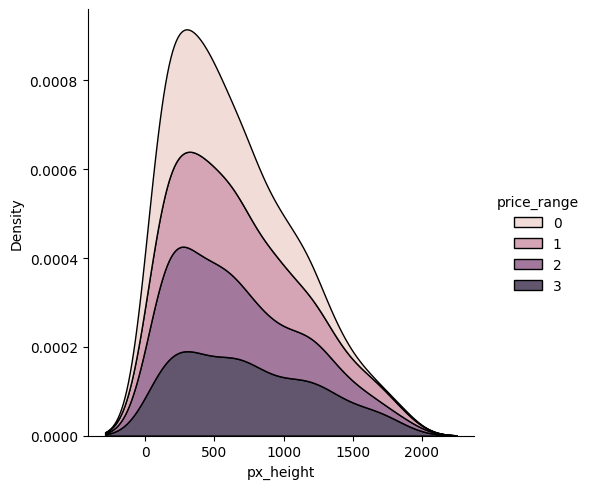

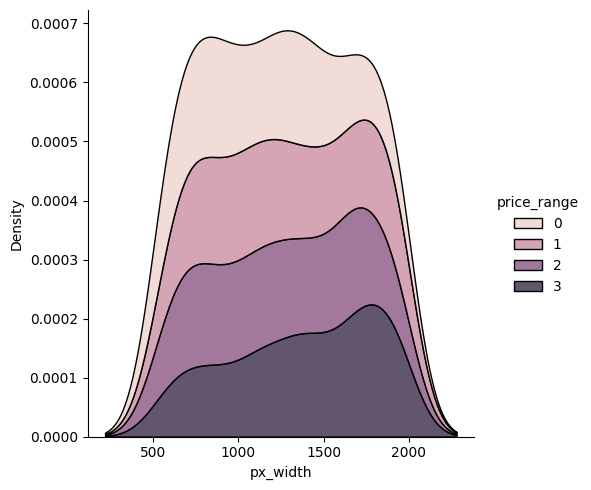

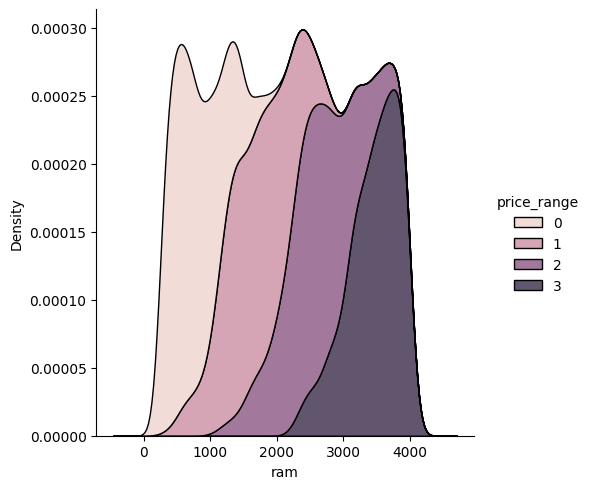

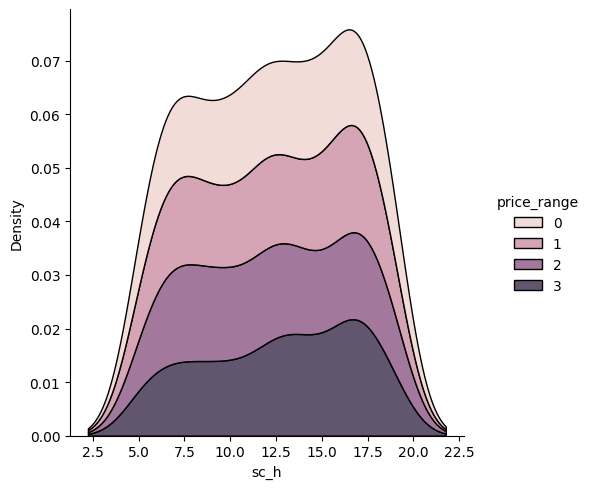

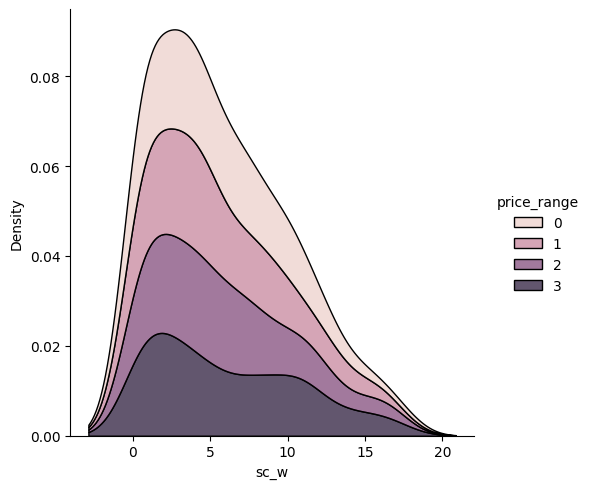

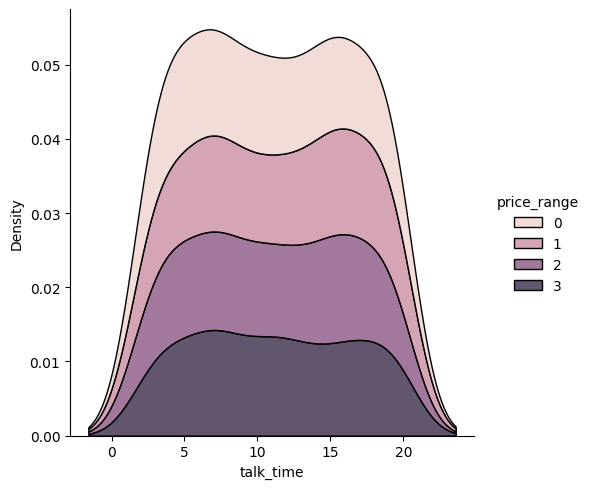

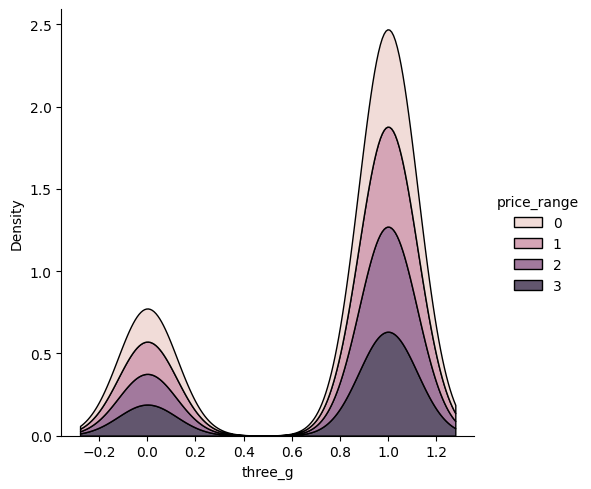

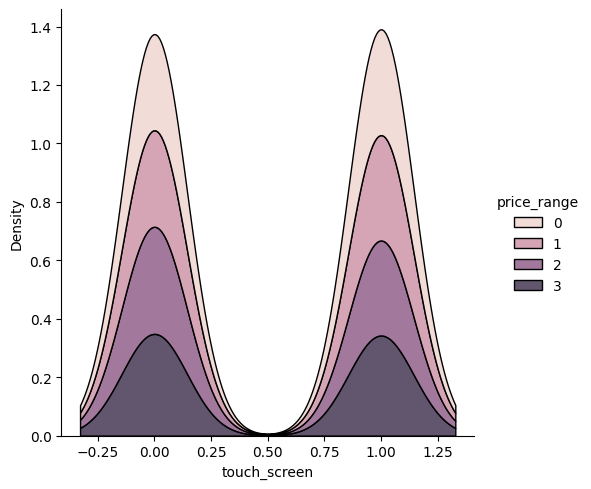

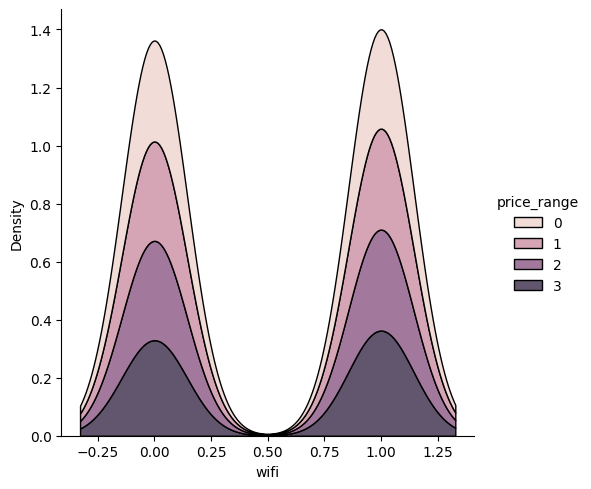

In [52]:
for i in train.columns : 
    if i != 'price_range':
        sns.displot(data= train, x=str(i), hue='price_range', kind="kde", multiple="stack")

In [59]:
a,b,c,d = y.unique()

2

## Bivariates analysis

Here the purpose is to find variables that discrimine the outcome with kruskall walliss test (more than 2 groups : outcome has 4 outcome)

Test Chi-2 for categorical variable = independance between two groups that the two variables are independent and have no relationship if p<0.05 we reject the null hypothesis 

In [62]:
from scipy import stats 
x1, x2, x3, x4 = train[train.price_range == a], train[train.price_range == b], train[train.price_range == c], train[train.price_range == d]
lst = {'variables' : [], 'pvalue': []}
for i in X.columns:
    lst['variables'].append(i)
    st, pv = stats.kruskal(x1[i], x2[i], x3[i], x4[i])
    lst['pvalue'].append(pv)

lst = pd.DataFrame(lst)
lst['Discriminant'] = lst.pvalue.apply(lambda x: 'Yes' if x <= .05 else 'No')

lst[lst.Discriminant == 'Yes']

    


,variables,pvalue,Discriminant
0,battery_power,2.048329e-19,Yes
6,int_memory,3.253315e-02,Yes
8,mobile_wt,1.274450e-02,Yes
9,n_cores,4.859243e-02,Yes
11,px_height,3.180105e-10,Yes
12,px_width,4.477100e-14,Yes
13,ram,0.000000e+00,Yes


In [217]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


<AxesSubplot: xlabel='blue', ylabel='count'>

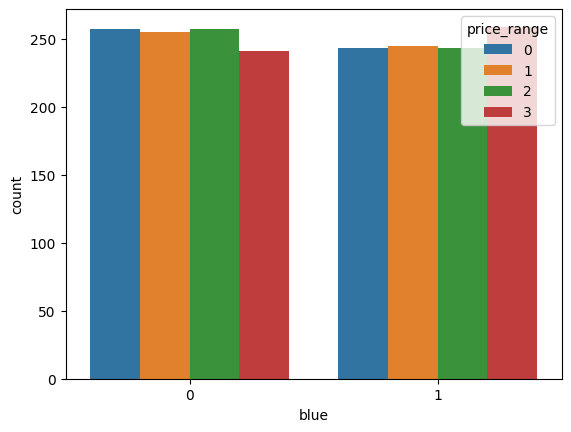

In [220]:
sns.countplot(data= train, x='blue', hue = 'price_range')

In [221]:
import os

In [257]:
class plot_data_variable():
    """ Class to plots density / bar plots """
    def __init__(self, 
                objective: str = 'NS') -> None:
        """ objective : survival : S or non survival : NS""" 
        self.objective = objective 

    def plot_variables(self, 
                        data: pd.DataFrame,
                        path: str = r"C:\Users\mehdy\Desktop\Work\KAGGLE\Mobile-price-classiffication\graphics",
                        N_col: int = 3,
                        figsize: list = [10,15],
                        category_col: list = None,
                        y:str = None): 
        """" Plot density plot for continuous variables and barplot for categorical variables
        data : dataframe
        N_col : Number of columns for subplots 
        figsize : list of x,y size for the entire plot
        path : the path where to save plots 
        y : if you want hue for plots """

        self.data = data
        self.y = y
        self.path = path

        self.data[category_col] = self.data[category_col].astype('category') 
        # checking if the directory demo_folder2 
        # exist or not.
        if not os.path.isdir(self.path):
            # if the demo_folder2 directory is 
            # not present then create it.
            os.makedirs(self.path)
            #save plot in the new folder 
        N_features = len(self.data.columns)
        # calculate of number of rows dependant of number of features 
        if N_features%N_col == 0:
            n_rows = np.int64(N_features/N_col)
        else:
            n_rows = np.int64(N_features/N_col) + 1

        # plot recursivly according to the type of variables
        fig, ax = plt.subplots(nrows=n_rows, ncols=N_col, figsize = (figsize[0],figsize[1]))
        fig.tight_layout(pad=5.0)
        ind_row = 0
        ind_col = 0
        for i in self.data.columns:
            if N_col == ind_col:
                ind_col = 0 
                ind_row += 1 
            if i in self.data.select_dtypes('category').columns.tolist():
                g = sns.countplot(data= self.data, x=str(i), ax=ax[ind_row][ind_col], hue=y)
                ind_col += 1  
            elif i in self.data.select_dtypes(exclude='category').columns.tolist():
                g = sns.histplot(data = self.data, x=str(i), hue=y,kde= True, ax=ax[ind_row][ind_col], multiple="stack")
                ind_col +=1
        
        
        title = "Density plots and barplots of variables.png"
        plt.suptitle(str(title))
        plt.savefig(os.path.join(self.path, title))



In [258]:
X.select_dtypes('category').columns.tolist()

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [259]:
data = train[:]
data[X.select_dtypes('category').columns.tolist()] = data[X.select_dtypes('category').columns.tolist()].astype('category')
data.dtypes

battery_power       int64
blue             category
clock_speed       float64
dual_sim         category
fc                  int64
four_g           category
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g          category
touch_screen     category
wifi             category
price_range      category
dtype: object

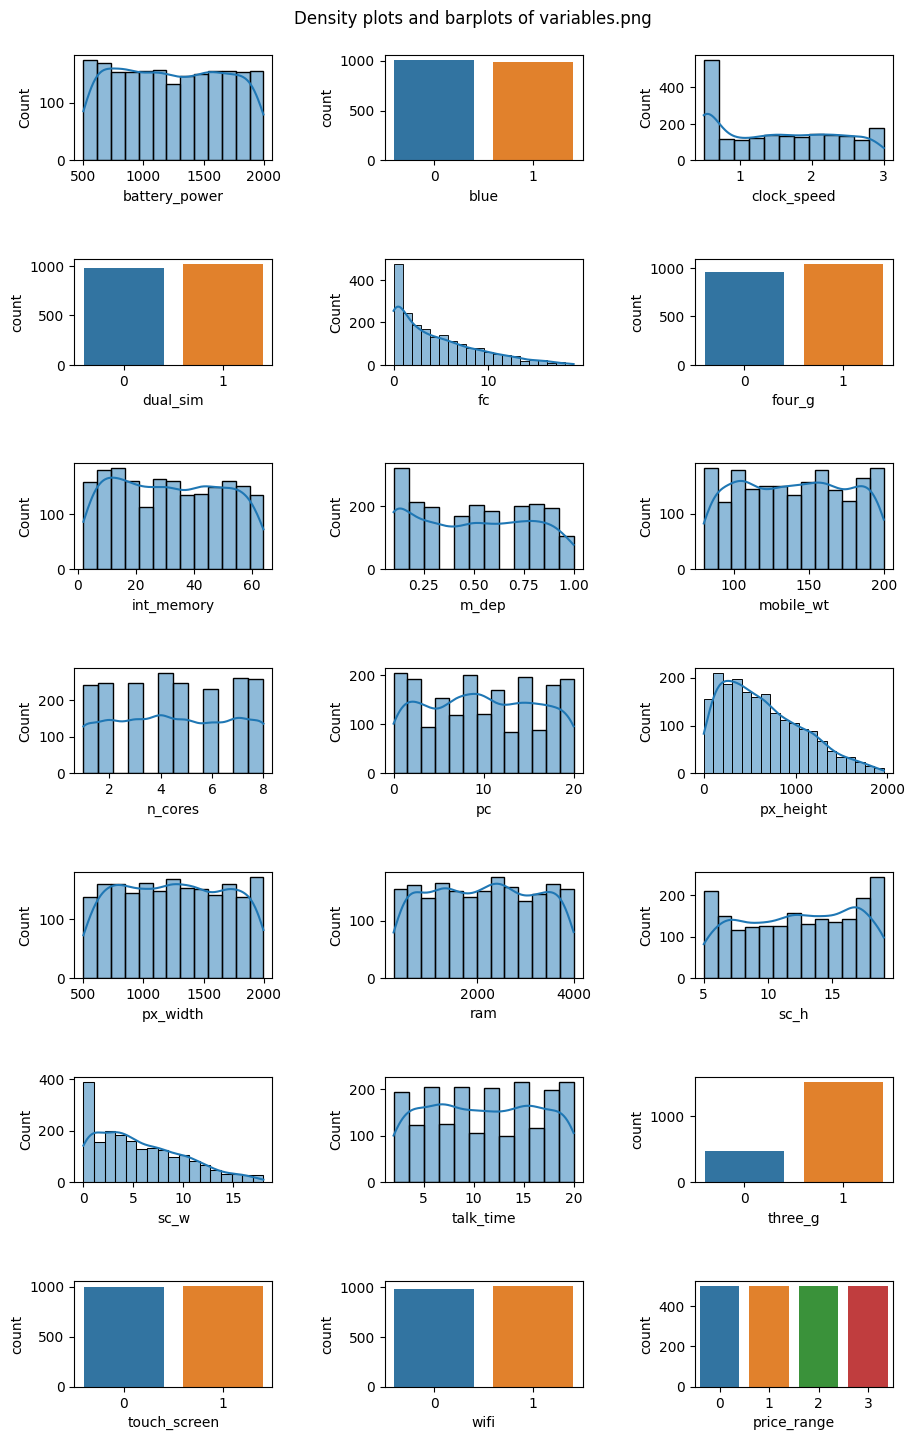

In [260]:
plot_all = plot_data_variable().plot_variables(data= train, category_col=X.select_dtypes('category').columns.tolist())

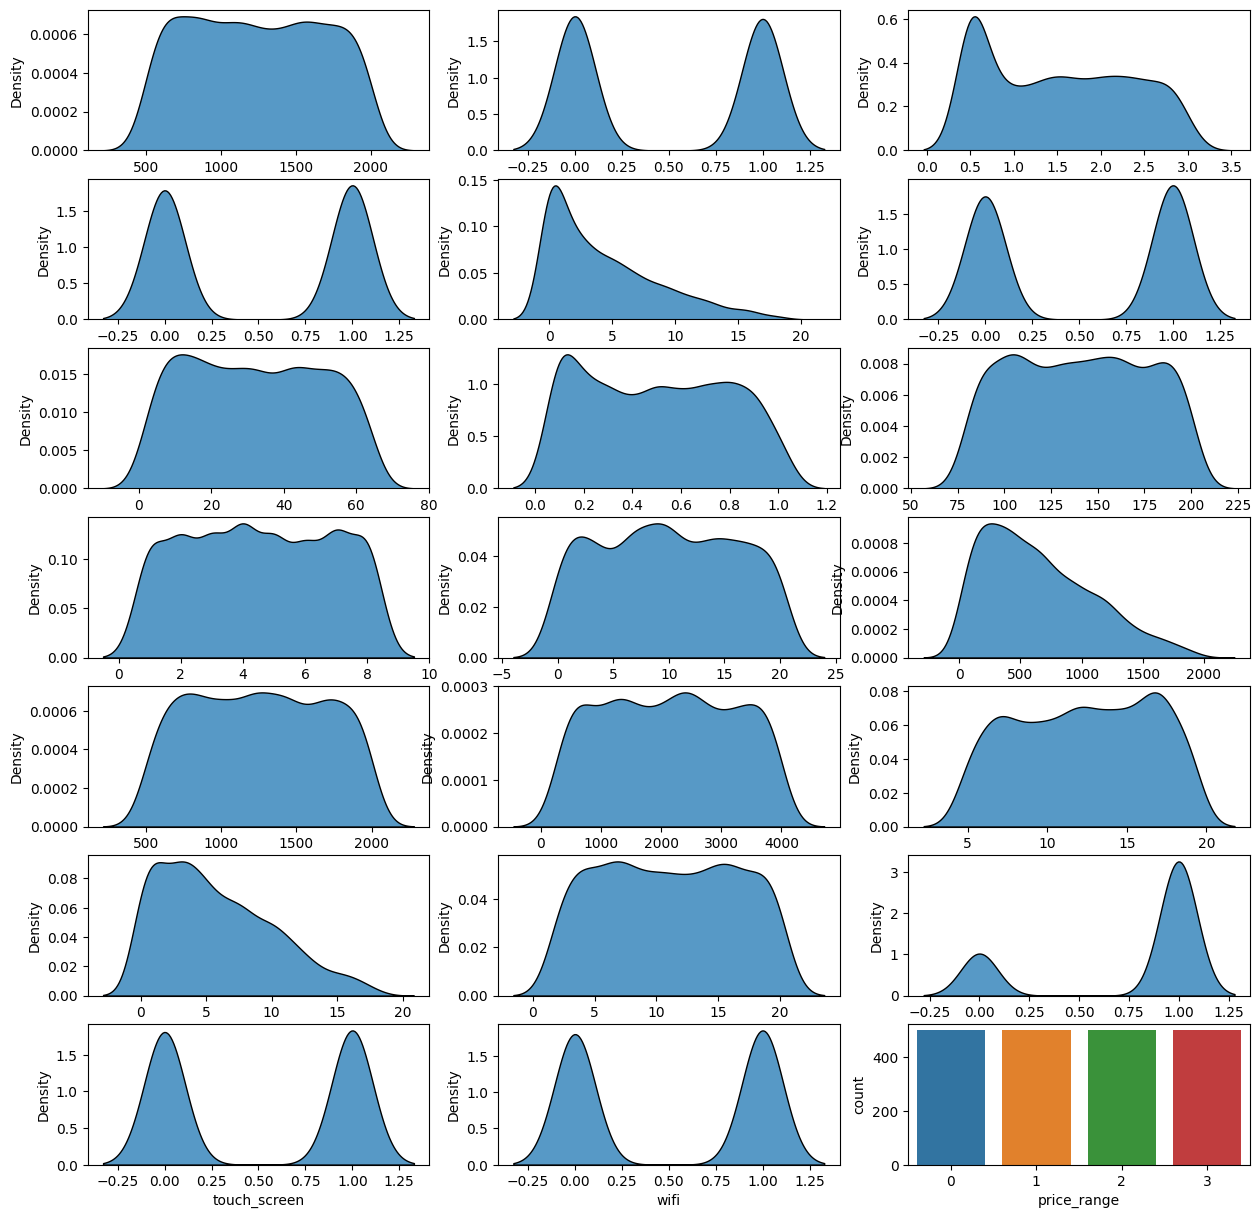

In [216]:
N_features = len(train.columns)
N_col = 3
if N_features%N_col == 0:
    n_rows = np.int64(N_features/N_col)
else:
    n_rows = np.int64(N_features/N_col) + 1
y = None
fig, ax = plt.subplots(nrows=n_rows, ncols=N_col, figsize = (15,15))
ind_row = 0
ind_col = 0
for i in train.columns:
    if N_col == ind_col:
        ind_col = 0 
        ind_row += 1 
    if i in train.select_dtypes('category').columns.tolist():
        g = sns.countplot(data= train, x=str(i), ax=ax[ind_row][ind_col])
        ind_col += 1  
    elif i in train.select_dtypes(exclude='category').columns.tolist():
        g = sns.kdeplot(data = train, x=str(i), hue=y, ax=ax[ind_row][ind_col], multiple="stack")
        ind_col +=1
    

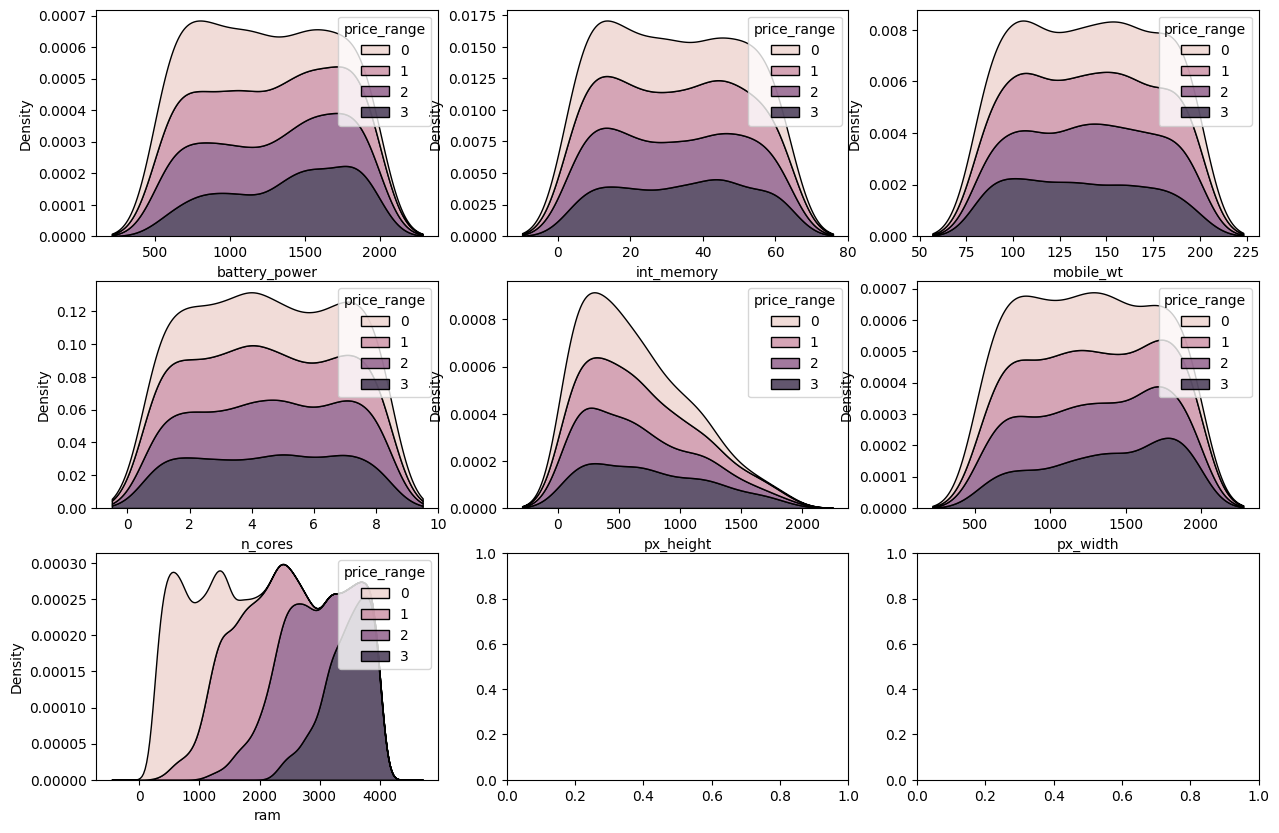

In [76]:
fig, ax = plt.subplots(3,3, figsize= (15,10))
t,j = 0,0
for i in lst[lst.Discriminant == 'Yes'].variables : 
    if i != 'price_range':
        sns.kdeplot(data= train, x=str(i), hue='price_range',   multiple="stack", ax = ax[t][j])
        j += 1
        if j == 3:
            j = 0
            t += 1

### Boxplots

In [78]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [81]:
dfr = sns.load_dataset("titanic")
dfr

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


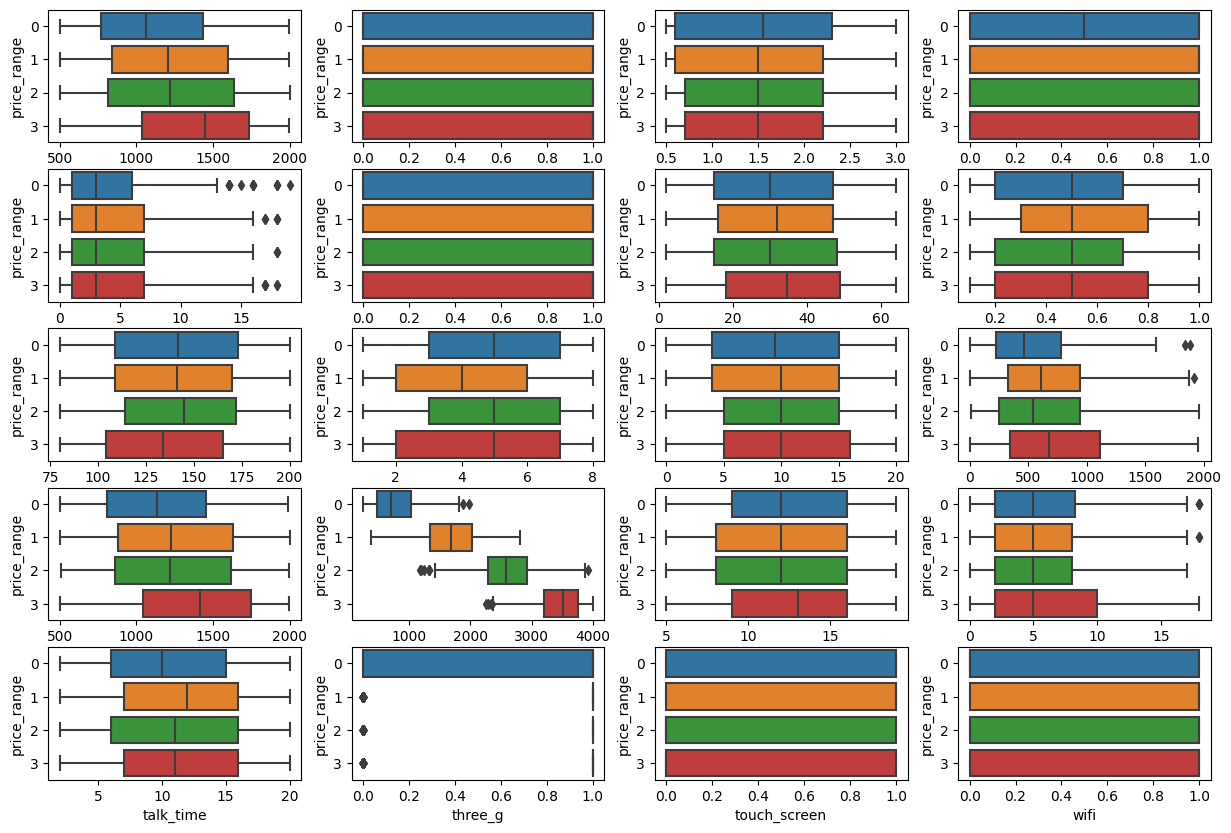

In [90]:
fig, ax = plt.subplots(5,4, figsize= (15,10))
t,j = 0,0
for i in train.columns : 
    if i != 'price_range':
        sns.boxplot(data= train, x=str(i), y='price_range' , ax = ax[t][j])
        j += 1
        if j == 4:
            j = 0
            t += 1

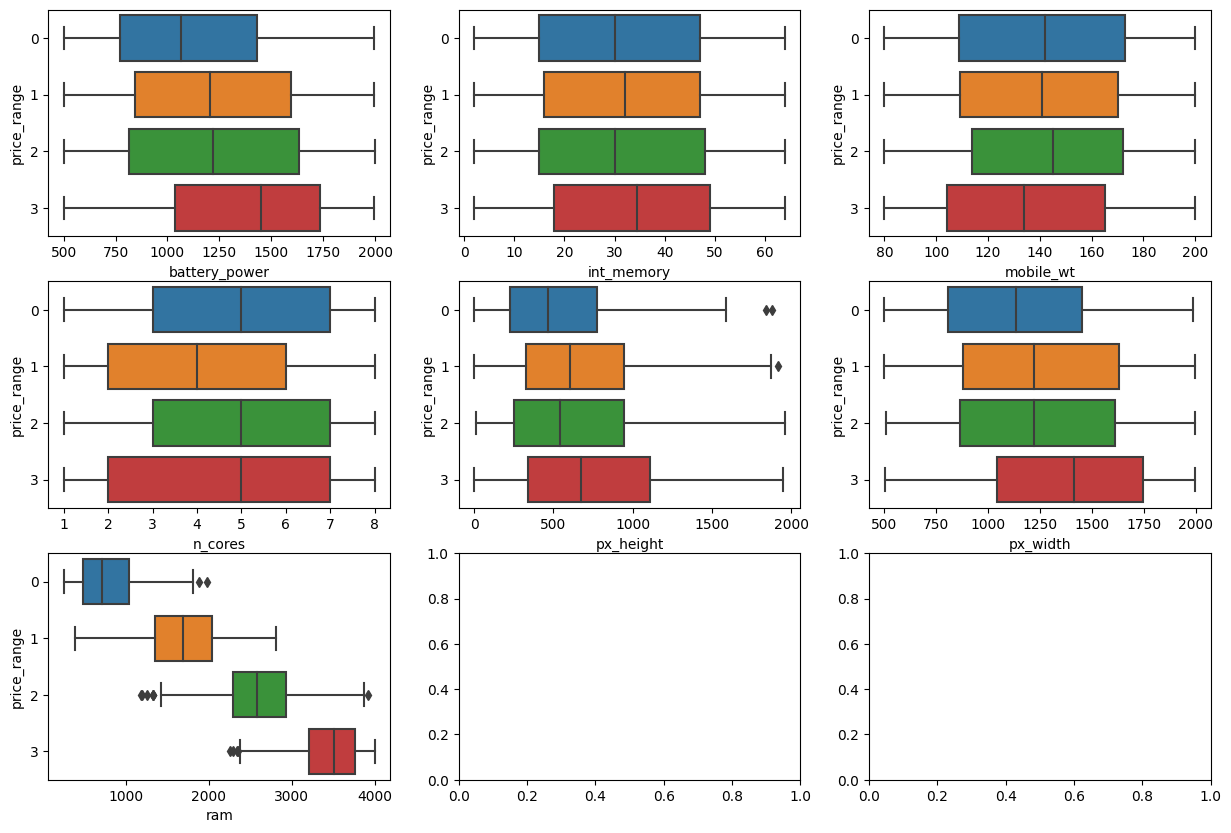

In [85]:
fig, ax = plt.subplots(3,3, figsize= (15,10))
t,j = 0,0
for i in lst[lst.Discriminant == 'Yes'].variables : 
    if i != 'price_range':
        sns.boxplot(data= train, x=str(i), y='price_range' , ax = ax[t][j])
        j += 1
        if j == 3:
            j = 0
            t += 1

We can notice some varible have difference on graphic according to the outcome

## Correlations

<AxesSubplot: >

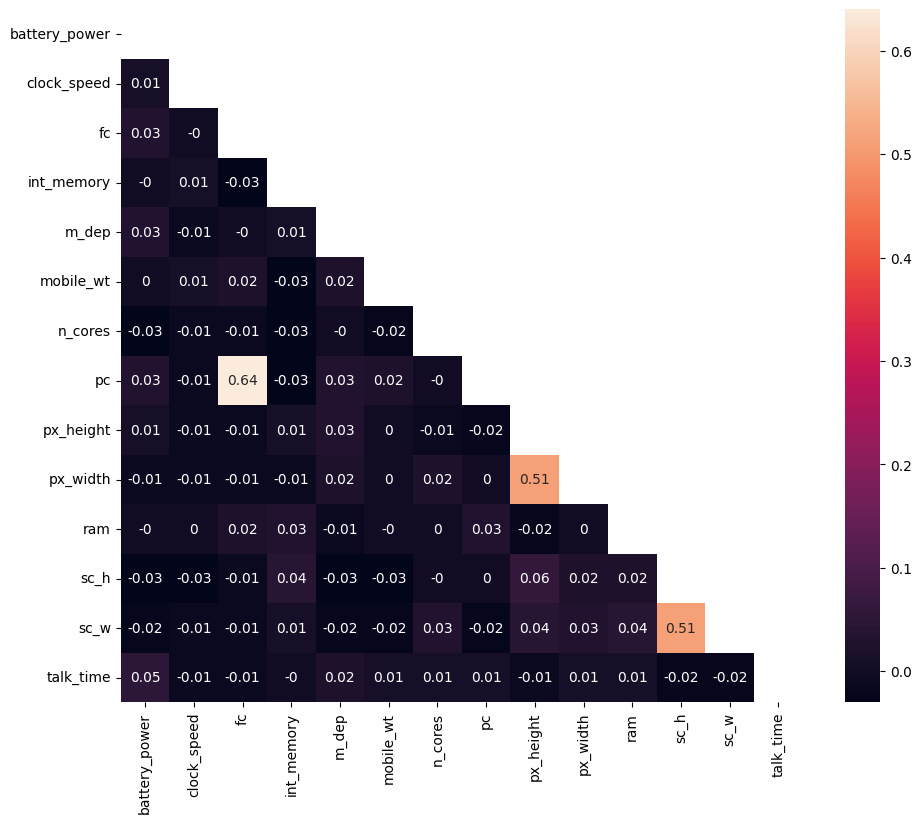

In [95]:
corr = np.round(X.select_dtypes(exclude='category').corr(),2)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(X.select_dtypes(exclude='category').corr()))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize= (11,9))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap( corr, mask=mask, annot=True)

There is not too much correlation between variables

# Prediction 

In [273]:
import sys
package_path = '..'
sys.path.insert(0, package_path)

import functions.models 

In [270]:
import sys, inspect
def print_classes():
    for name, obj in inspect.getmembers(sys.modules[__name__]):
        if inspect.isclass(obj):
            print(obj)

In [276]:
inspect.getmembers(functions.models)

[('BaseEstimator', sklearn.base.BaseEstimator),
 ('ClassifierMixin', sklearn.base.ClassifierMixin),
 ('DecisionTree', functions.models.DecisionTree),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('Elasticnet', functions.models.Elasticnet),
 ('LGBMClassifier', lightgbm.sklearn.LGBMClassifier),
 ('Lasso', sklearn.linear_model._coordinate_descent.Lasso),
 ('LightGBM', functions.models.LightGBM),
 ('LinRegression', functions.models.LinRegression),
 ('LinearRegression', sklearn.linear_model._base.LinearRegression),
 ('LinearSVM', functions.models.LinearSVM),
 ('LogisticReg', functions.models.LogisticReg),
 ('LogisticRegression', sklearn.linear_model._logistic.LogisticRegression),
 ('Pipeline', sklearn.pipeline.Pipeline),
 ('RandomForest', functions.models.RandomForest),
 ('RandomForestClassifier', sklearn.ensemble._forest.RandomForestClassifier),
 ('Ridge', sklearn.linear_model._ridge.Ridge)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)

In [104]:
for i in X_train.select_dtypes('category'):
    print(X_train[i].unique())
print('No need to one hot encoding')

[0, 1]
Categories (2, int64): [0, 1]
[1, 0]
Categories (2, int64): [0, 1]
[1, 0]
Categories (2, int64): [0, 1]
[1, 0]
Categories (2, int64): [0, 1]
[1, 0]
Categories (2, int64): [0, 1]
[0, 1]
Categories (2, int64): [0, 1]
No need to one hot encoding


## Basics 

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



dtc = DecisionTreeClassifier(random_state=4505).fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_pred= y_pred, y_true= y_test))
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))
print('prediction error is ', 1-sum(y_pred == y_test)/len(y_test))

[[151  18   0   0]
 [ 14 130  17   1]
 [  0  22 117  23]
 [  0   0  26 141]]
              precision    recall  f1-score   support

     class 0       0.92      0.89      0.90       169
     class 1       0.76      0.80      0.78       162
     class 2       0.73      0.72      0.73       162
     class 3       0.85      0.84      0.85       167

    accuracy                           0.82       660
   macro avg       0.82      0.82      0.82       660
weighted avg       0.82      0.82      0.82       660

prediction error is  0.18333333333333335


In [135]:
from sklearn.ensemble import RandomForestClassifier
dtc = RandomForestClassifier(random_state=4505).fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_pred= y_pred, y_true= y_test))
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))
print('prediction error is ', 1-sum(y_pred == y_test)/len(y_test))

[[160   9   0   0]
 [ 10 140  12   0]
 [  0  18 129  15]
 [  0   0  19 148]]
              precision    recall  f1-score   support

     class 0       0.94      0.95      0.94       169
     class 1       0.84      0.86      0.85       162
     class 2       0.81      0.80      0.80       162
     class 3       0.91      0.89      0.90       167

    accuracy                           0.87       660
   macro avg       0.87      0.87      0.87       660
weighted avg       0.87      0.87      0.87       660

prediction error is  0.12575757575757573


## Gridsearch

In [158]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=2)
param = { 'max_depth': [10,12,15,20], 'n_estimators': [50, 75, 100]}
gcv = GridSearchCV(estimator= rf ,
            param_grid= param,
            scoring= 'accuracy',
            n_jobs= 5,
            cv = 10, 
            verbose= 2,
            )
gcv.fit(X_train, y_train)
print('Best score ', gcv.best_score_, 'with params ', gcv.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best score  0.8671641791044775 with params  {'max_depth': 15, 'n_estimators': 100}


In [161]:
y_pred = gcv.best_estimator_.predict(X_test)
print(confusion_matrix(y_pred= y_pred, y_true= y_test))
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))
print('prediction error is ', 1-sum(y_pred == y_test)/len(y_test))

[[159  10   0   0]
 [  7 148   7   0]
 [  0  17 129  16]
 [  0   0  16 151]]
              precision    recall  f1-score   support

     class 0       0.96      0.94      0.95       169
     class 1       0.85      0.91      0.88       162
     class 2       0.85      0.80      0.82       162
     class 3       0.90      0.90      0.90       167

    accuracy                           0.89       660
   macro avg       0.89      0.89      0.89       660
weighted avg       0.89      0.89      0.89       660

prediction error is  0.1106060606060606


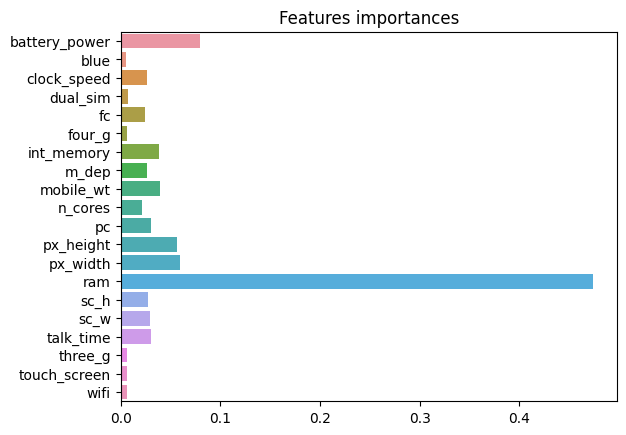

In [167]:
sns.barplot( x = gcv.best_estimator_.feature_importances_, y = X_train.columns)
plt.title('Features importances')
plt.show()

In [174]:
ft_imp = pd.DataFrame({'imp': gcv.best_estimator_.feature_importances_}, index= X_train.columns ).sort_values(by= 'imp', ascending= False)
ft_imp

,imp
ram,0.474092
battery_power,0.079679
px_width,0.059363
px_height,0.056332
mobile_wt,0.039434
int_memory,0.037945
talk_time,0.030574
pc,0.029904
sc_w,0.029350
sc_h,0.027454


In [179]:
top10_var = ft_imp.iloc[:5].index.tolist()
top10_var

['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt']

In [180]:
X_train_b, X_test_b = X_train[top10_var], X_test[top10_var]


rf = RandomForestClassifier(random_state=2)
param = { 'max_depth': [10,12,15,20], 'n_estimators': [50, 75, 100]}
gcv = GridSearchCV(estimator= rf ,
            param_grid= param,
            scoring= 'accuracy',
            n_jobs= 5,
            cv = 10, 
            verbose= 2,
            )
gcv.fit(X_train_b, y_train)
print('Best score ', gcv.best_score_, 'with params ', gcv.best_params_)


y_pred = gcv.best_estimator_.predict(X_test_b)
print(confusion_matrix(y_pred= y_pred, y_true= y_test))
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))
print('prediction error is ', 1-sum(y_pred == y_test)/len(y_test))


Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best score  0.9082089552238806 with params  {'max_depth': 12, 'n_estimators': 100}
[[160   9   0   0]
 [  5 148   9   0]
 [  0  13 138  11]
 [  0   0  11 156]]
              precision    recall  f1-score   support

     class 0       0.97      0.95      0.96       169
     class 1       0.87      0.91      0.89       162
     class 2       0.87      0.85      0.86       162
     class 3       0.93      0.93      0.93       167

    accuracy                           0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660

prediction error is  0.08787878787878789


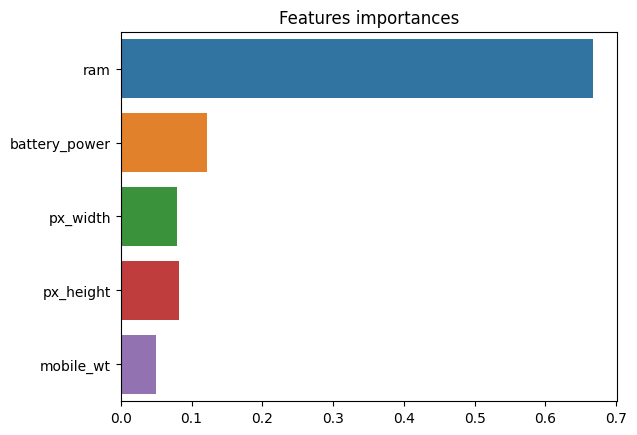

In [182]:
sns.barplot( x = gcv.best_estimator_.feature_importances_, y = X_train_b.columns)
plt.title('Features importances')
plt.show()